In [1]:
import ROOT

Welcome to JupyROOT 6.26/02


In [2]:
import array

fileout = ROOT.TFile("data.root", "recreate")
sig = ROOT.TTree("sig", "Tree with exponential distribution")
x=array.array('f', [0])
sig.Branch("x", x, "x/F")

In [3]:
ran = ROOT.TRandom3(12345)
numValues = ran.Poisson(4000)
tau = 100.
m = 125.
sigma = 5.
nsig = 0

In [4]:
for i in range(numValues):
  isSig = ran.Rndm()<0.008
  if isSig:
      x[0] = ran.Gaus(m,sigma)
      nsig+=1
  else:
    x[0] = ran.Exp(tau);
  sig.Fill()
  
print(f'generated {nsig} signal events')

generated 26 signal events


Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


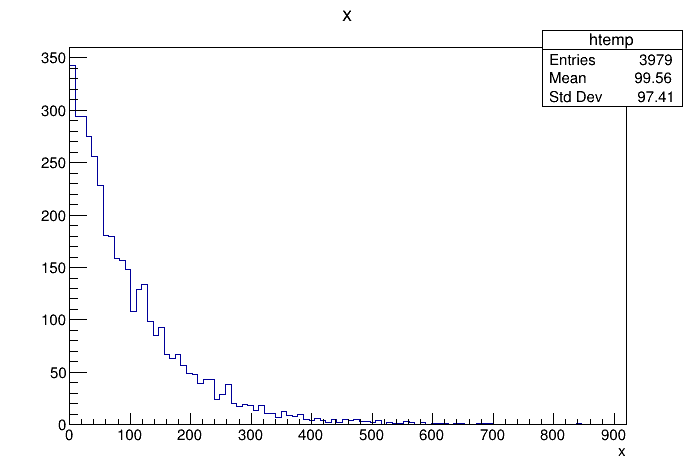

In [5]:
sig.Draw("x")
ROOT.gPad.Draw()

In [6]:
fileout.Write()
fileout.Close()